In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from scipy.stats import zscore
import jenkspy
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [2]:
flower=pd.read_csv('Flower.csv')
flower

,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0
...,...,...,...
395,0.450368,2.408121,1
396,0.037573,0.891601,1
397,0.213641,1.732016,1
398,0.324387,-2.116325,1


In [3]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   Class   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
print("X1: ",max(flower['X1']),min(flower["X1"]),"\n","X2: ",max(flower['X2']),min(flower["X2"]))

X1:  4.078165875644617 -4.211898112302497 
 X2:  4.037643470481512 -4.035124003739587


so the X is normalized already

In [5]:
flower["Class"].value_counts()

1    200
0    200
Name: Class, dtype: int64

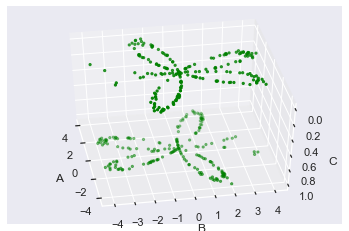

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=flower["X1"], ys=flower["X2"], zs=flower["Class"], zdir='z', s=5, c=["green"], depthshade=True)
ax.view_init(-135, 10)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

no need to resample

In [6]:
d_train,d_test=train_test_split(flower,test_size=0.2,random_state=7)
d_train

,X1,X2,Class
270,4.043884,1.427822,1
98,-2.526185,-0.403306,0
81,-3.771825,-1.338471,0
50,-0.745290,-0.662748,0
244,-1.398930,-2.036061,1
...,...,...,...
211,-1.768230,-2.807001,1
67,-2.923444,-0.642638,0
25,0.984590,3.773771,0
196,-0.023254,-0.448211,0


In [7]:
d_train_y=d_train["Class"]
d_train_y.value_counts()
d_test_y=d_test["Class"]
d_test_y.value_counts()

1    43
0    37
Name: Class, dtype: int64

In [8]:
d_train_x=d_train.copy()
d_train_x=d_train_x.drop("Class",axis=1)
d_train_x
d_test_x=d_test.copy()
d_test_x=d_test_x.drop("Class",axis=1)
d_test_x

,X1,X2
265,2.365535,1.600948
65,-2.385786,-1.518515
120,3.559908,-1.123432
132,3.088620,-0.797674
378,1.544578,-3.562420
...,...,...
221,-1.155415,-1.583598
59,-3.513036,-1.778950
362,1.407020,-3.902664
74,-3.864536,-1.399589


In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000, activation="tanh")
mlp.fit(d_train_x, d_train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [10]:
predictions = mlp.predict(d_test_x)
predictions

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [11]:
print(confusion_matrix(d_test_y,predictions))
print(classification_report(d_test_y,predictions))

[[33  4]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.90      0.84      0.87        43

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [21]:
def plot_prediction(model, X, y):
    x_min, x_max = X.T.iloc[0, :].min() - 1, X.T.iloc[0, :].max() + 1
    y_min, y_max = X.T.iloc[1, :].min() - 1, X.T.iloc[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('X1')
    plt.xlabel('X2')
    plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=y.iloc[:], cmap=plt.cm.Spectral)

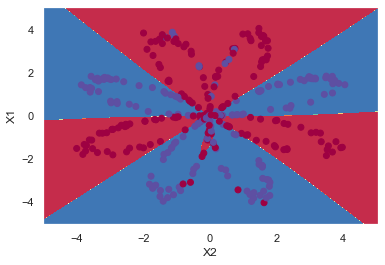

In [24]:
plot_prediction(lambda x: mlp.predict(x), d_train_x, d_train_y)

the way the we saw the scatter plot of or data this plot is showing us our two groups (its like that we are seeing that scatter plot from above with all those areas that have z=0 az red groups and others as blue groups),that mean the red area is class zero and blue one is class one.

the activation function has the most effect on my model

# Q2:

In [46]:
bank=pd.read_csv('Banknote.csv')
bank

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [47]:
bank=bank.rename(columns={"3.6216": "a", "8.6661": "b","-2.8073": "c","-0.44699": "d","0":"e"})
bank

,a,b,c,d,e
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [49]:
bank["e"].value_counts()

0    761
1    610
Name: e, dtype: int64

In [51]:
print("a: ",max(bank['a']),min(bank['a']),"\n","b: ",max(bank['b']),min(bank['b']),"\n"
     "c: ",max(bank['c']),min(bank['c']),"\n"
     "d: ",max(bank['d']),min(bank['d']),"\n"
     "e: ",max(bank['e']),min(bank['e']))

a:  6.8248 -7.0421 
 b:  12.9516 -13.7731 
c:  17.9274 -5.2861 
d:  2.4495 -8.5482 
e:  1 0


In [144]:
bank=bank.drop(["e"],axis=1)

ranges are close together so no need to normalize them

In [145]:
d_train,d_test=train_test_split(bank,test_size=0.2,random_state=7)
d_train

,a,b,c,d
447,3.93640,10.588500,-3.72500,-4.313300
681,3.73210,-3.884000,3.35770,-0.006049
1297,-0.96070,2.696300,-3.12260,-1.312100
96,2.16160,-6.880400,8.15170,-0.081048
980,-6.05980,9.295200,-0.43642,-6.369400
...,...,...,...,...
211,2.61400,8.008100,-3.72580,-1.306900
502,4.92940,0.277270,0.20792,0.336620
537,0.72252,-0.053811,5.67030,-1.350900
1220,-1.83560,-6.756200,5.05850,-0.550440


In [146]:
km=KMeans(n_clusters=2).fit(d_train)

In [147]:
predictions=km.predict(d_test)

In [148]:
print(confusion_matrix(d_test_y,predictions))
print(classification_report(d_test_y,predictions))

[[ 42 116]
 [ 46  71]]
              precision    recall  f1-score   support

           0       0.48      0.27      0.34       158
           1       0.38      0.61      0.47       117

    accuracy                           0.41       275
   macro avg       0.43      0.44      0.40       275
weighted avg       0.44      0.41      0.39       275



In [149]:
clusters=km.labels_
clusters

array([1, 0, 1, ..., 0, 0, 1])

In [150]:
centroids=km.cluster_centers_
centroids

array([[-0.4827212 , -4.60799705,  6.04517579, -0.04118516],
       [ 0.81349338,  5.32234564, -0.92630665, -1.84004026]])

In [151]:
cluster1=d_train.loc[clusters==0]
cluster2=d_train.loc[clusters==1]
cluster1

,a,b,c,d
681,3.73210,-3.884000,3.3577,-0.006049
96,2.16160,-6.880400,8.1517,-0.081048
643,3.03330,-2.592800,2.3183,0.303000
1065,-2.62860,0.180020,1.7956,0.972820
748,0.88298,0.660090,6.0096,-0.432770
...,...,...,...,...
1092,0.74428,-3.772300,1.6131,1.575400
1191,-4.40180,-12.937100,15.6559,-1.680600
535,2.76590,0.662160,4.1494,-0.284060
537,0.72252,-0.053811,5.6703,-1.350900


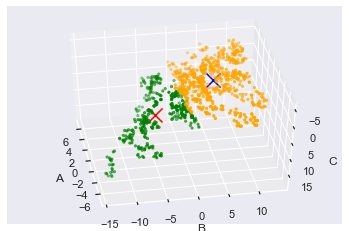

In [152]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=cluster1["a"], ys=cluster1["b"], zs=cluster1["c"], zdir='z', s=5, c=["green"], depthshade=True)
# ax = fig.add_subplot(projection='3d')
ax.scatter(xs=cluster2["a"], ys=cluster2["b"], zs=cluster2["c"], zdir='z', s=5, c=["orange"], depthshade=True)
ax.scatter(xs=centroids[0][0], ys=centroids[0][1], zs=centroids[0][2], zdir='z', s=200, marker="x",c=["red"], depthshade=True)
ax.scatter(xs=centroids[1][0], ys=centroids[1][1], zs=centroids[1][2], zdir='z', s=200, marker="x",c=["blue"], depthshade=True)
ax.view_init(-135, 10)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

Kmeans algorithms:


K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

For now “auto” (kept for backward compatibiliy) chooses “elkan” but it might change in the future for a better heuristic.

In [153]:
print("interia: ",km.inertia_)

interia:  35350.18791709184


In [154]:
interia_list=[]
for i in range(1,6):
    km=KMeans(n_clusters=i).fit(d_train)
    interia_list.append(km.inertia_)
interia_list

[72879.35425802052,
 35350.18791709184,
 23460.177969352888,
 19429.110472321845,
 15959.661435777482]

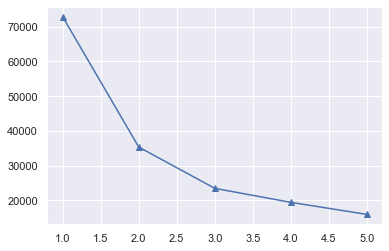

In [155]:
plt.plot([1,2,3,4,5], interia_list, marker = '^')

with increasing the cluster numbers the interia decreases too we pick the cluster number that reduses th interia the most and after that no specific changes occurs
so we choose 2 clusters.

though the most changes occurs between 1 and 2.

In [156]:
silhouette_list=[]
for i in range(2,7):
    km=KMeans(n_clusters=i).fit(d_train)
    silhouette_list.append(silhouette_score(d_train, km.labels_))
silhouette_list

[0.43339826892009176,
 0.37739062898538195,
 0.35018986812127817,
 0.3409450319230249,
 0.3308206500064342]

the changes between (1,2) and (2,3) has the most changes so we the best cluster maybe 2 or 2.

we choose 2 clusters same as previous methode of evaluation.

# Q3:

In [157]:
from urllib.request import urlretrieve

In [158]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [159]:
urlretrieve(iris)

('C:\\Users\\mohammad\\AppData\\Local\\Temp\\tmpi4i7whf4',
 <http.client.HTTPMessage at 0x26b17975e48>)

In [168]:
d_iris = pd.read_csv(iris, sep=',')
d_iris

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [169]:
d_iris=d_iris.rename(columns={"5.1": "sepal_length", "3.5": "sepal_width","1.4": "petal_length","0.2": "petal_width"})
d_iris

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [170]:
d_iris=d_iris.drop(["Iris-setosa"],axis=1)
d_iris

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


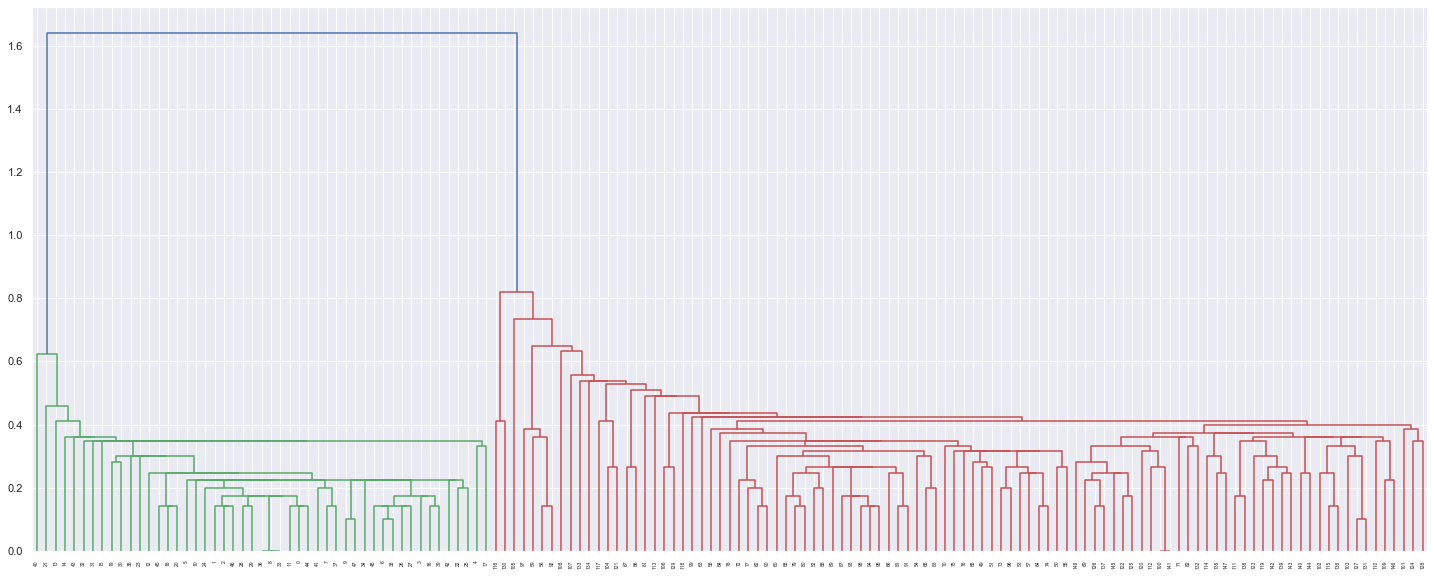

In [173]:
Z = linkage(d_iris)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

this plot shows how many clusters we can choose from this data set(the maximum count).

In [205]:
A=fcluster(Z, t=6, criterion='maxclust')
A.cout_values()

AttributeError: 'numpy.ndarray' object has no attribute 'cout_values'

In [200]:
B=fcluster(Z, t=3, criterion='maxclust')
B

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [202]:
plt.scatter( A, marker = '^')

TypeError: scatter() missing 1 required positional argument: 'y'